In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
(images, labels), (testX, testY) = mnist.load_data()

images = np.array(images).astype("float").reshape(-1,784) / 255
labels = np.array(labels)
X = images
Y = labels
testX = np.array(testX).astype("float").reshape(-1, 784) / 255
testY= np.array(testY)

testX.shape, testY.shape, X.shape, Y.shape

((10000, 784), (10000,), (60000, 784), (60000,))

In [14]:

images = np.array(images).astype("float") / 255
labels = np.array(labels)
X=images
Y=labels
testX = np.array(testX).astype("float") / 255
testY= np.array(testY)

In [129]:
digits = labels

In [130]:
digits[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [4]:
digits = np.array(images)

In [5]:
digits.shape

(60000, 28, 28)

In [6]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [ ]:
p.shape

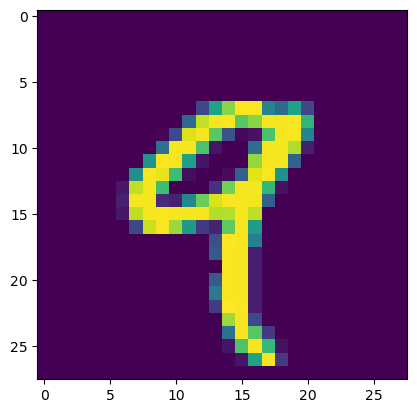

In [7]:
plt.imshow(p[4,::])

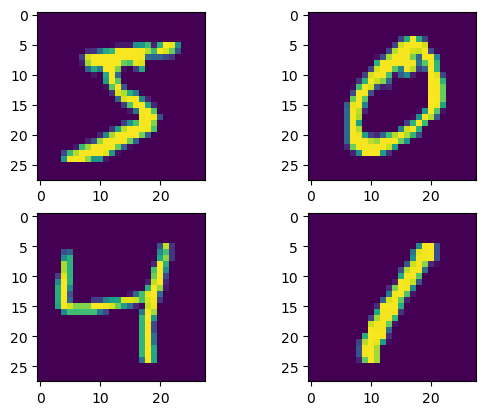

In [8]:
plt.subplot(221)
plt.imshow(p[0,::])
plt.subplot(222)
plt.imshow(p[1,::])
plt.subplot(223)
plt.imshow(p[2,::])
plt.subplot(224)
plt.imshow(p[3,::])
plt.savefig("MNIST.png", dpi=300, bbox_inches="tight")

In [12]:
X.shape, Y.shape

((60000, 28, 28), (60000,))

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X, Y)
lr.score(testX, testY)

0.7793

In [16]:
lr.coef_.shape

(10, 784)

In [22]:
lr.predict_log_proba(testX.reshape((-1,784)))

array([[-2.70242359, -2.49921278, -2.67210392, ..., -1.22259553,
        -2.73588614, -2.11609236],
       [-2.31758479, -2.10403165, -1.87259742, ..., -3.00113358,
        -2.40587695, -2.98871877],
       [-3.03790463, -1.12718883, -2.46901194, ..., -2.37831216,
        -2.64931609, -2.62924818],
       ...,
       [-3.12261685, -2.59565931, -2.63806328, ..., -2.06851973,
        -2.06487967, -1.89341336],
       [-2.47059878, -1.97428487, -2.45891843, ..., -2.27084598,
        -2.15637153, -2.48549637],
       [-1.79470752, -3.18056106, -2.0681407 , ..., -3.21618433,
        -2.78321461, -2.83558232]])

In [23]:
def optim0(image):
    #print(type(image))
    #print(image.shape)
    g=lr.predict_log_proba(X[0,:]+image[np.newaxis,:])
    return(g[0][0])

In [26]:
from scipy.optimize import minimize

init = np.random.random((28,28))
init.shape

(28, 28)

In [67]:
init_flat = init.reshape((1,-1))[0]
init_flat.shape

(784,)

In [68]:
type(init_flat), init_flat.shape

(numpy.ndarray, (784,))

In [69]:
optim0(init_flat)

-8.113298924877247e-10

In [70]:
t = minimize(optim0, init_flat)

t

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -8.113298924877247e-10
        x: [ 9.890e-01  6.635e-01 ...  8.215e-01  2.616e-01]
      nit: 0
      jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 785
     njev: 1

In [74]:
init0 = np.zeros((28,28)).reshape(-1,1)[0]
optim0(init0)

-2.2987112921912183

In [75]:
t = minimize(optim0, init0)


/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))
/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))
/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))
/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))
/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-pack

In [76]:
t

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -2.2987112921912183
        x: [ 0.000e+00]
      nit: 0
      jac: [ 4.130e+02]
 hess_inv: [[1]]
     nfev: 216
     njev: 102

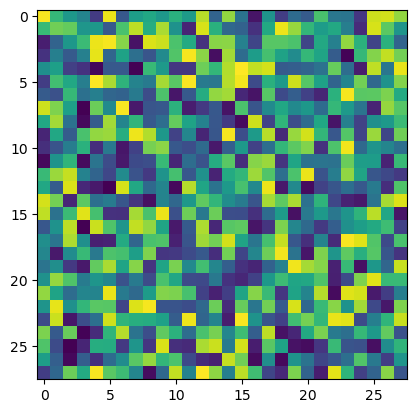

In [71]:
plt.imshow(t.x.reshape((28,28)))

In [34]:
X[0,:]
lr.predict(X[0,:].reshape(1,-1))

array([3], dtype=uint8)

In [35]:
lr.predict((t.x+X[0,:]).reshape(1,-1))

array([0], dtype=uint8)

In [83]:
crange = np.exp(np.arange( - 9, 9, 2))
fits = []
for c in crange:
    print(c)
    fits.append(LogisticRegression(C=c, max_iter=100, penalty="l2", solver="liblinear").fit(X, Y))
accuracy = [f.score(testX, testY) for f in fits]

0.00012340980408667956
0.0009118819655545162
0.006737946999085467
0.049787068367863944
0.36787944117144233
2.718281828459045
20.085536923187668
148.4131591025766
1096.6331584284585


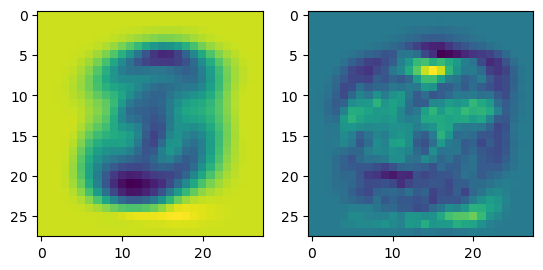

In [84]:
# Let us compare a highly regularized set of linear regression 
# coefficients with a almost-unregularized set.

plt.subplot(1,2,1)
plt.imshow(fits[0].coef_[9,:].reshape((28,28)))
plt.subplot(1,2,2)
plt.imshow(fits[-1].coef_[9,:].reshape((28,28)))


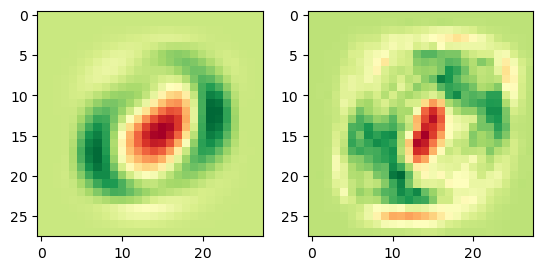

In [85]:
# Maybe a diverging colormap would help us here?

plt.subplot(1,2,1)
plt.imshow(fits[1].coef_[0,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,2,2)
plt.imshow(fits[-1].coef_[0,:].reshape((28,28)), cmap="RdYlGn")

In [ ]:
plt.plot(crange, accuracy)
plt.semilogx()

[]

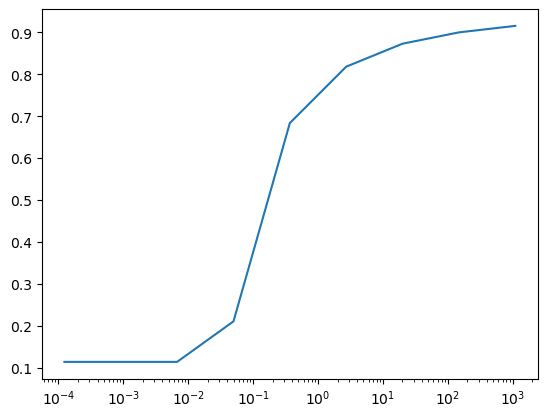

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 784.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
        -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
        -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
         0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ]),
 <BarContainer object of 30 artists>)

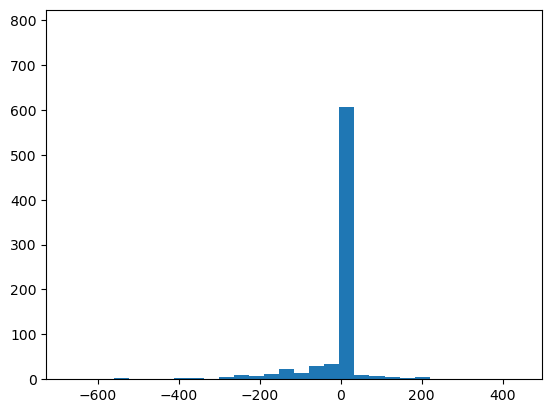

In [40]:
# The regularized parameters should be closer to 0...
plt.hist(fits_l1[-1].coef_[1,:], bins=30)
plt.hist(fits_l1[0].coef_[1,:], bins=30)

In [91]:
# What about L1 regularization?  This will effectively throw
# out pixels that have too little influence on the result.
crange2 = np.power(10.0, np.arange( - 5, 5, 1))
fits_l1 = []
for c in crange2:
    print(c)
    fits_l1.append(LogisticRegression(C=c, max_iter=100, penalty="l1", solver="liblinear").fit(X, Y))
accuracy_l1 = [f.score(testX, testY) for f in fits_l1]


1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0


Text(0, 0.5, 'Accuracy on holdout set')

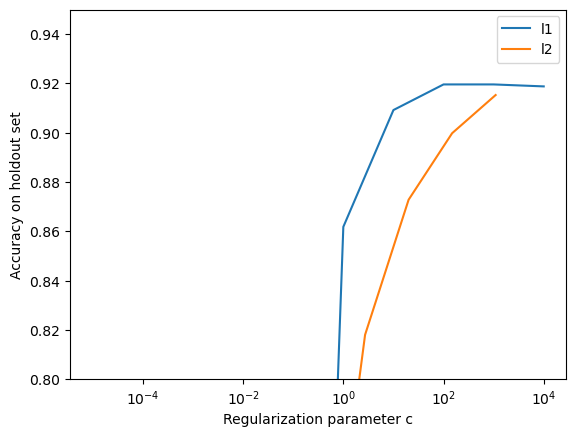

In [92]:
plt.plot(crange2, accuracy_l1, label="l1")
plt.plot(crange, accuracy, label="l2")
plt.semilogx()
plt.ylim((0.8, 0.95))
plt.legend()
plt.xlabel("Regularization parameter c")
plt.ylabel("Accuracy on holdout set")

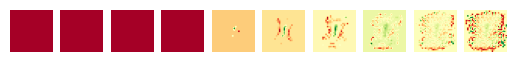

In [97]:
fits=fits_l1
for i in range(len(fits)):
    plt.subplot(1, len(fits), i+1)
    plt.imshow(fits_l1[i].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
   # plt.title("C = {:d}".format(crange2))
    plt.axis("off")

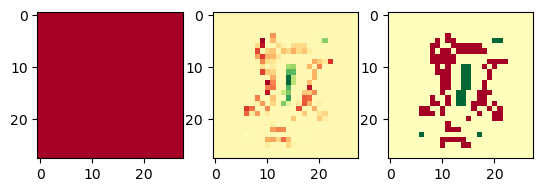

In [98]:
plt.subplot(1,3,1)
plt.imshow(fits_l1[3].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,3,2)
plt.imshow(fits_l1[6].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,3,3)
l=0.03
plt.imshow(np.maximum(-l, np.minimum(l, fits_l1[6].coef_[1,:].reshape((28,28)))), cmap="RdYlGn")

In [46]:
from sklearn.decomposition import TruncatedSVD

In [47]:
svd = TruncatedSVD( 50).fit(X)

In [48]:
svd.explained_variance_ratio_

array([0.05807749, 0.08246405, 0.07095205, 0.06116264, 0.05283004,
       0.04319133, 0.03626566, 0.02910758, 0.02878759, 0.02363035,
       0.02124947, 0.02050351, 0.01716084, 0.0170527 , 0.01590455,
       0.01489269, 0.01363987, 0.01295398, 0.01189454, 0.01152786,
       0.01066264, 0.01006965, 0.00954502, 0.00914597, 0.0088423 ,
       0.00839983, 0.00814284, 0.00786443, 0.00744774, 0.00690986,
       0.00658438, 0.00648345, 0.00602933, 0.00590415, 0.00570111,
       0.00544272, 0.00505769, 0.00487789, 0.00481414, 0.00472609,
       0.00457232, 0.0044483 , 0.00419982, 0.00397829, 0.00385214,
       0.0037399 , 0.00361602, 0.00351399, 0.00337915, 0.00320524])

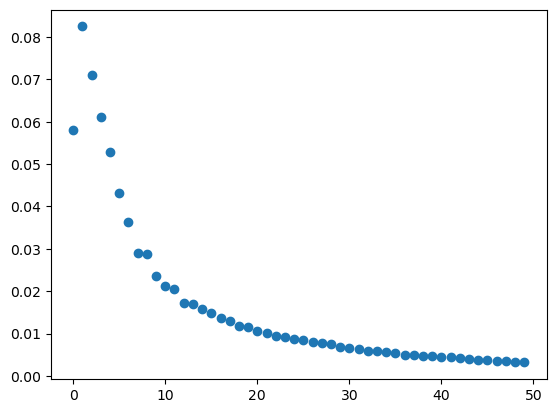

In [49]:
plt.plot(svd.explained_variance_ratio_, 'o')

In [50]:
svd.components_.shape

(50, 784)

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_71414/1089844561.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5 , i+1)


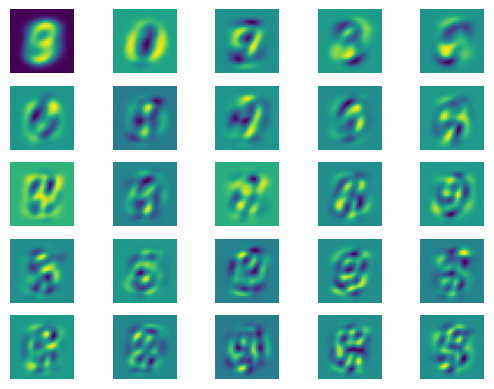

In [51]:
p, a =plt.subplots(1, len(fits))
for i in range(25):
    plt.subplot(5,5 , i+1)
    plt.imshow(svd.components_[i].reshape((28,28)))
    plt.axis("off")

In [52]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
svdreg = TruncatedSVD( 50).fit(scaler.transform(X))

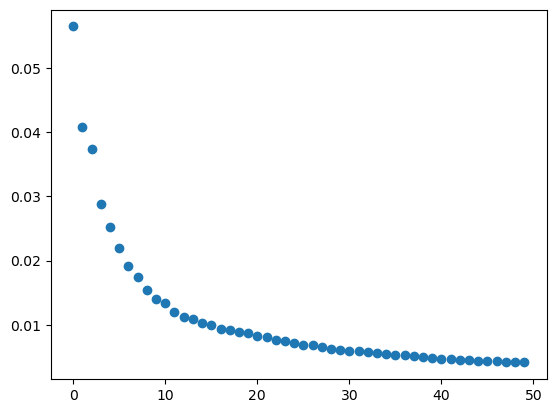

In [53]:
plt.plot(svdreg.explained_variance_ratio_, 'o')

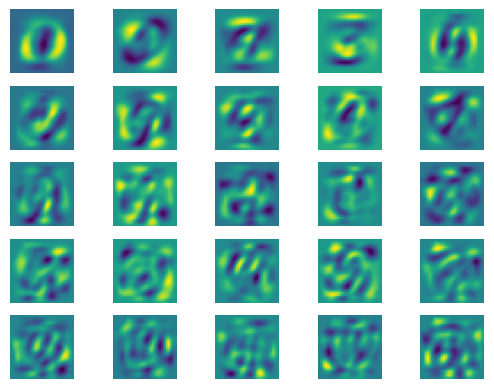

In [54]:
for i in range(25):
    plt.subplot(5,5 , i+1)
    plt.imshow(svdreg.components_[i].reshape((28,28)))
    plt.axis("off")

In [ ]:
# Keep in mind, these are from the variance of the data--no labels
# were used in constructing these vectors.
# And, this procedure is linear in the data; no regularization 
# was applied, just averaging.

In [ ]:
# Now we can project X onto the PCA components; we do 
# this by matrix multiplication

In [55]:
svd.components_.shape

(50, 784)

In [56]:
PC = np.dot( X, svd.components_.T)

In [57]:
PC.shape

(60000, 50)

In [58]:
h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels = []
for i,l in enumerate(Y):
    colorlabels.append(h[l])


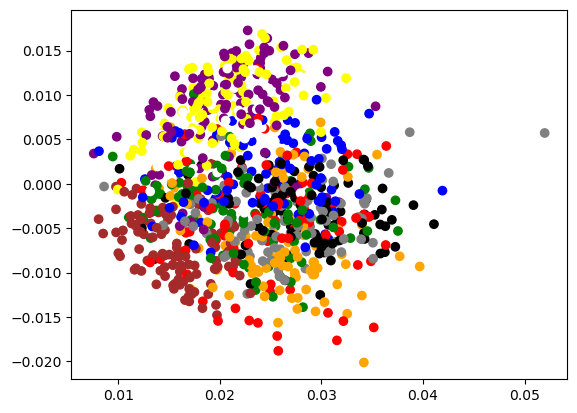

In [59]:
plt.scatter(PC[0:1000,0], PC[0:1000,2] , c= colorlabels[0:1000])

In [60]:
# Calculate average digits
avgdigit =[]
stddigit =[]
for i in range(10):
    avgdigit.append(images[np.where(labels==i)].mean(axis=0).reshape((28,28)))
    stddigit.append(images[np.where(labels==i)].std(axis=0).reshape((28,28)))
avgdigit=np.array(avgdigit)
avgdigit.shape

(10, 28, 28)

In [61]:
avgdigit_reshape = avgdigit.reshape((10, -1))

In [62]:
svd_avg = TruncatedSVD(9).fit(scaler.transform(avgdigit_reshape))

In [63]:
svd_avg.components_.shape

(9, 784)

In [64]:
PC = np.dot(svd_avg.components_, X.T).T

In [ ]:
plt.scatter(PC[0:1000,0], PC[0:1000,1] , c= colorlabels[0:1000])

In [ ]:
plt.scatter(PC[0:1000,2], PC[0:1000,3] , c= colorlabels[0:1000])

In [ ]:
plt.scatter(PC[0:1000,4], PC[0:1000,5] , c= colorlabels[0:1000])